In [1]:
#This notebook was used to: solve the system in Hamiltonian form and
#Commence the stochastic analysis, get acquainted qith the methods etc
#No figures from this notebook were included in the written report
#Hamiltonian
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def HamiltonianRHS(vec, t):
    dvecdt = np.zeros_like(vec)
    z=vec[2]
    dvecdt[0:3] = vec[3:]/m
    dvecdt[3:5] = -m*(w**2-lambd*z)*vec[0:2]
    dvecdt[5] = -m*(4*w**2*z-0.5*lambd*(vec[0]**2+vec[1]**2))
    return dvecdt
#HamiltonianRHS = np.vectorize(HamiltonianRHS)

Populating the interactive namespace from numpy and matplotlib
Equations solved


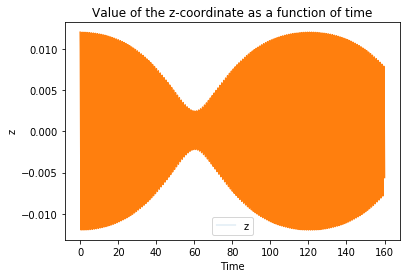

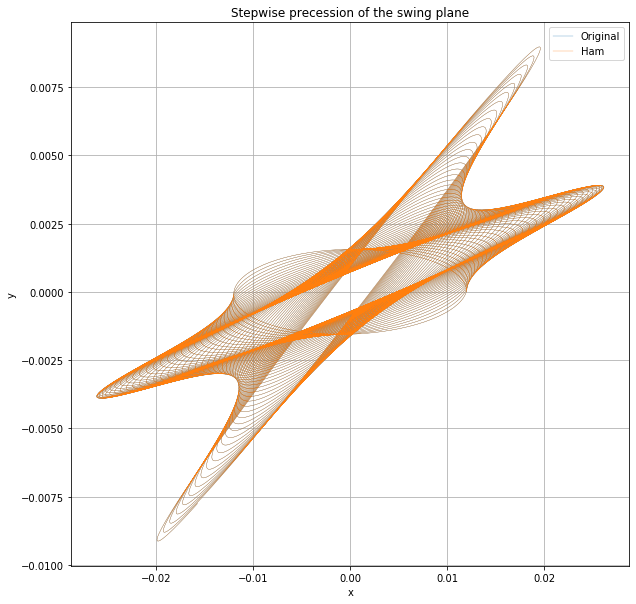

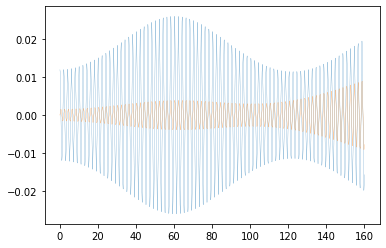

In [2]:
#112 check Hamiltonian solution agrees to Lagrangian
def RHS(u,t,w):
    """For 1:1:2 resonance"""
    lambd = 3*np.pi**2
    dydt = np.zeros(6)
    x = u[0]
    y = u[2]
    z = u[4]
    dydt[0] = u[1]
    dydt[1] = lambd*x*z-x*w**2
    dydt[2] = u[3]
    dydt[3] = lambd*y*z-y*w**2
    dydt[4] = u[5]
    dydt[5] = lambd/2*(x**2+y**2)-4*w**2*z
    return dydt

%pylab inline
from scipy.integrate import odeint
y0d = 0.00489
x0 = 0.012
z0 = 0.012
ic = (x0,0,0,y0d,z0,0)
ic2 = (x0,0,z0,0,y0d,0)
w = np.pi
l= 1
g = np.pi**2
k = np.pi**2*4
m = 1
l_0 = 3/4*l
lambd = l_0*4*w**2/l
T = 160
t = np.linspace(0,T,12001)
u1 = odeint(RHS,ic,t,args=(w,),atol=0.00000000001)
u2= odeint(HamiltonianRHS, ic2 ,t, atol=0.000000001)
x = u1[:,0]
y = u1[:,2]
z = u1[:,4]
x2 = u2[:,0]
y2 = u2[:,1]
z2 = u2[:,2]
print('Equations solved')
plt.figure()

#plt.plot(t,x,label='x')
#plt.plot(t,y,label='y')
plt.plot(t,z,label='z', linewidth=0.2)
plt.plot(t,z2)
plt.legend()
plt.title('Value of the z-coordinate as a function of time')
plt.xlabel('Time')
plt.ylabel('z')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(x,y,linewidth=0.3,label='Original')
plt.plot(x2,y2,linewidth=0.3,label='Ham')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stepwise precession of the swing plane')
plt.legend()
plt.show()
plt.plot(t,x,linewidth=0.2)
plt.plot(t,y,linewidth=0.2)


In [169]:
#this is a first attempt at Stochasticity
T = 3
t = np.linspace(0,T,10001)
u1 = odeint(RHS,ic,t,args=(w,),atol=0.00000000001)
u2= odeint(HamiltonianRHS, ic2 ,t, atol=0.000000001)
x = u1[:,0]
y = u1[:,2]
z = u1[:,4]
x2 = u2[:,0]
y2 = u2[:,1]
z2 = u2[:,2]
t = np.linspace(0,T,10001)
#u1 = odeint(RHS,ic,t,args=(w,),atol=0.00000000001)
u2= odeint(HamiltonianRHS, ic2 ,t, atol=0.000000001)

x2 = u2[:,0]
y2 = u2[:,1]
z2 = u2[:,2]
dt = t[1]-t[0]
print(f'time step is {dt}, square root time step is {dt**(1/2)}')

time step is 3e-05, square root time step is 0.005477225575051661


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


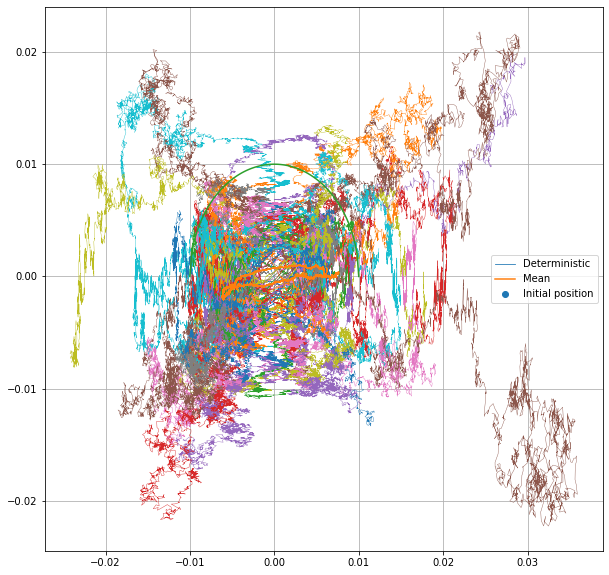

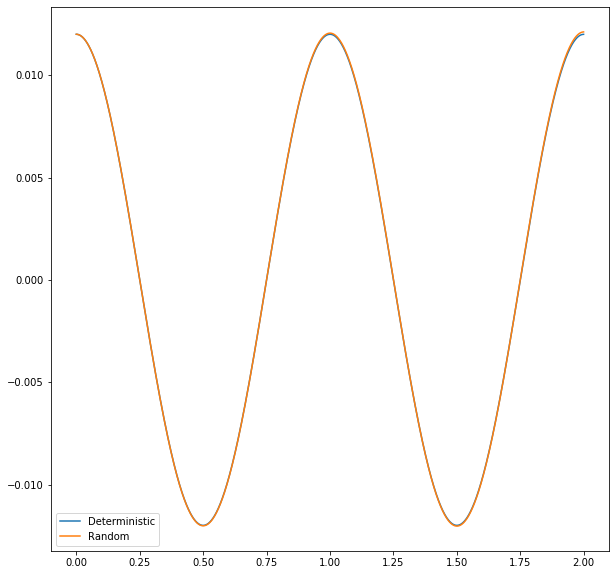

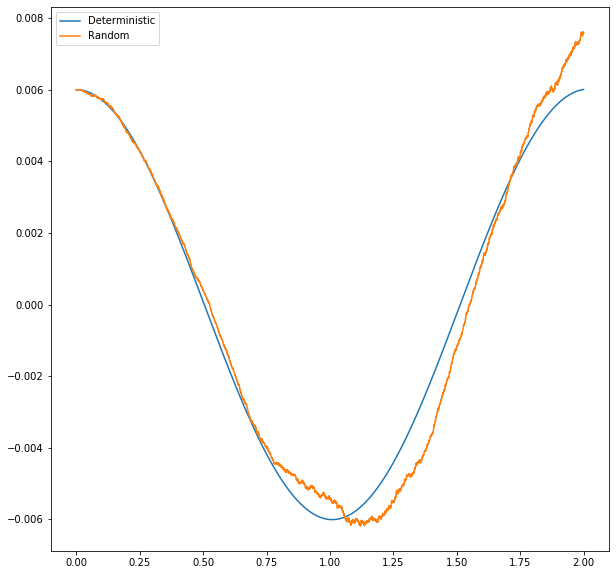

In [152]:
#Euler Maruyama first attempt
n = len(t)
N_simulations = 1


def dW(delta_t):
    """Sample a random number at each call."""
    return np.random.normal(size=(6,1), loc = 0.0, scale = np.sqrt(delta_t))
permutation_mat=np.array([0,-1,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,-1,0,[0,0,0,1,0,0],[0,0,0,0,0,0]])
def L_val(vec, t):
    matrix=permutation_mat@vec/m
    np.diag([-vec[1], vec[0],0, -vec[4], vec[3],0])/m
    return np.diag([-vec[1], vec[0],0, -vec[4], vec[3],0])/m
    #return np.eye(6)*sigma
plt.figure(figsize(10,10))
plt.scatter(ic2[0],ic2[1], label='Initial position')
plt.plot(x2,y2, linewidth =0.8, label='Deterministic')
mean_path = np.zeros((n, 6))
for _ in range(N_simulations):
    u = np.zeros((n, 6))
    u[0,:] = ic2
    for i in range(n-1):
        vec = u[i,:]
        #print(np.shape(L_val(vec, t) @ dW(dt)))
        u[i+1,:] = vec + HamiltonianRHS(vec, t)*dt + np.transpose(L_val(vec, t)@dW(dt))
    xr = u[:,0]
    yr = u[:,1]
    mean_path += u
    plt.plot(xr,yr, linewidth = 0.4)
    #print(f'Simulation {_}')

x_m = mean_path[:,0]/N_simulations
y_m = mean_path[:,1]/N_simulations
z_m = mean_path[:,2]/N_simulations
x_env1 = np.linspace(-0.01,0.01,100)
y_env1=np.sqrt(0.01**2-x_env1**2)
plt.plot(x_m,y_m, label='Mean')
plt.plot(x_env1, y_env1)
plt.grid()
plt.legend()
plt.show()
plt.plot(t,z2,label='Deterministic')
plt.plot(t,z_m, label='Random')
plt.legend()
plt.show()
plt.plot(t,x2,label='Deterministic')
plt.plot(t,x_m, label='Random')
plt.legend()
plt.show()


Simulation 0


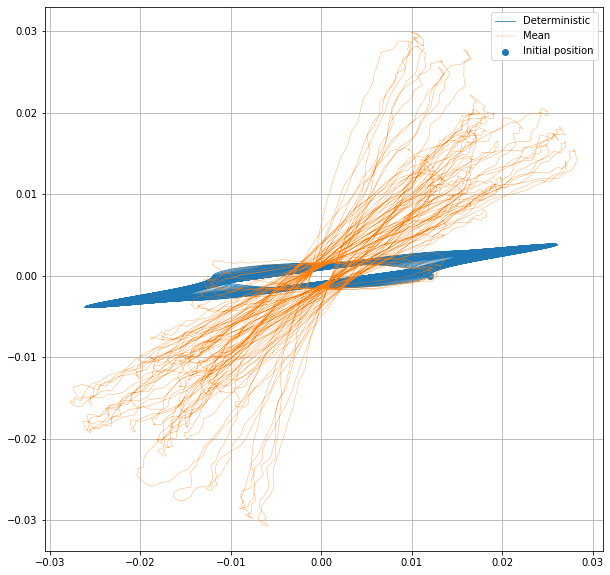

In [4]:
#Range-kutta from roberts
permutation_mat = np.array([[0,-1,0,0,0,0],[1,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,-1,0],[0,0,0,1,0,0],[0,0,0,0,0,0]])
T = 100
t1 = np.linspace(0,T,10001)
u2= odeint(HamiltonianRHS, ic2 ,t1, atol=0.000000001)
n = 5001
t = np.linspace(0,T,n)

N_simulations = 1
sigma=0.1
h=t[1]-t[0]
dt=h
sqrh=np.sqrt(h)
def dW(delta_t):
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))
def L_val(vec, t):
    return permutation_mat@vec/m*sigma
    #return sigma

plt.figure(figsize(10,10))
plt.scatter(ic2[0],ic2[1], label='Initial position')
plt.plot(u2[:,0],u2[:,1], linewidth =0.8, label='Deterministic')
mean_path = np.zeros((n, 6))
S=np.array([-1,1])
#Iteration
for _ in range(N_simulations):
    u = np.zeros((n, 6))
    u[0,:] = ic2
    for i in range(n-1):
        vec = u[i,:]
        S_k = np.random.choice(S)
        dW_t= dW(dt)
        K_1 = h*HamiltonianRHS(vec, i) + (dW_t-S_k*sqrh)*L_val(vec, i)
        K_2 = h*HamiltonianRHS(vec+K_1,i) + (dW_t+S_k*sqrh)*L_val(vec+K_1,i)
        #vec_hat = vec+ HamiltonianRHS(vec, i)*delta_t + L_val(vec, i)*np.sqrt(delta_t)
        #u[i+1,:] = vec + HamiltonianRHS(vec, i)*dt + np.transpose(L_val(vec, i)@dW(dt))
        u[i+1,:] = vec +0.5*(K_1+K_2)
    xr = u[:,0]
    yr = u[:,1]
    mean_path += u
    #plt.plot(xr,yr, linewidth = 0.4)
    print(f'Simulation {_}')

x_m = mean_path[:,0]/N_simulations
y_m = mean_path[:,1]/N_simulations
z_m = mean_path[:,2]/N_simulations
plt.plot(x_m,y_m, label='Mean', linewidth=0.3)

plt.grid()
plt.legend()
plt.show()


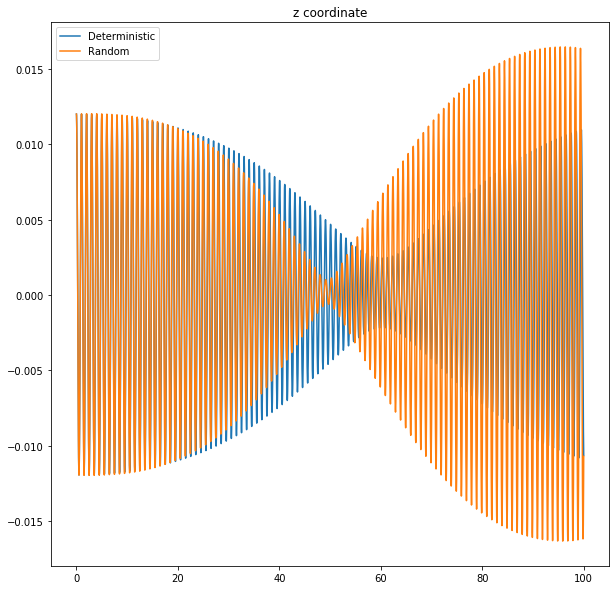

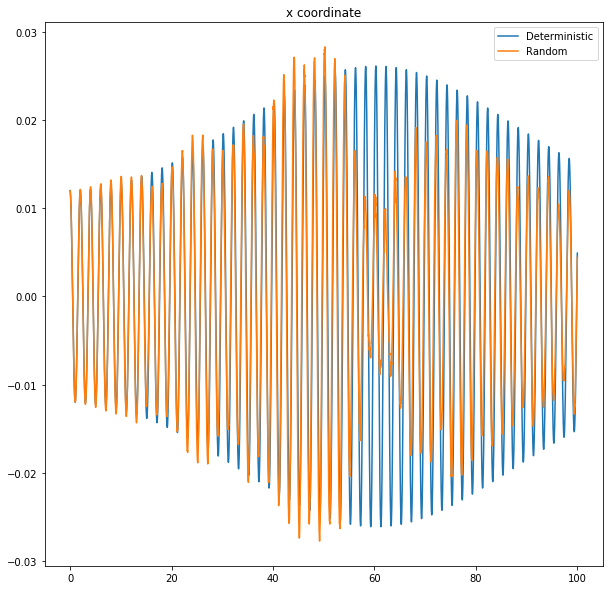

In [5]:
z_m = mean_path[:,2]/N_simulations
plt.plot(t1,u2[:,2],label='Deterministic')
plt.plot(t,z_m, label='Random')
plt.title('z coordinate')
plt.legend()
plt.show()
plt.plot(t1,u2[:,0],label='Deterministic')
plt.plot(t,x_m, label='Random')
plt.title('x coordinate')
plt.legend()
plt.show()

In [6]:
#attempt to speed up code using parallel computing: it failed
import multiprocessing
print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  8


In [ ]:
#Do not use this cell
from multiprocessing import Process
def func(k):
    print(k)
    u = np.zeros((n, 6))
    u[0,:] = ic2
    for i in range(n-1):
        vec = u[i,:]
        S_k = np.random.choice(S)
        dW_t= dW(dt)
        K_1 = h*HamiltonianRHS(vec, i) + (dW_t-S_k*sqrh)*L_val(vec, i)
        K_2 = h*HamiltonianRHS(vec+K_1,i) + (dW_t+S_k*sqrh)*L_val(vec+K_1,i)
        #vec_hat = vec+ HamiltonianRHS(vec, i)*delta_t + L_val(vec, i)*np.sqrt(delta_t)
        #u[i+1,:] = vec + HamiltonianRHS(vec, i)*dt + np.transpose(L_val(vec, i)@dW(dt))
        u[i+1,:] = vec +0.5*(K_1+K_2)
    xr = u[:,0]
    yr = u[:,1]
    mean_path += u
    print('work')
    #plt.plot(xr,yr, linewidth = 0.4)
    return mean_path
def number(k):
    
#a_pool = multiprocessing.Pool()
#result = a_pool.map(func, range(10))
#result